# Cálculo de Distancias Geodésicas con Geopy:

Objeto efectuar la conversion de archivos kml (obtenidos en google earth) a csv, se debe usar la siguiente dirección:
https://mygeodata.cloud/converter/kml-to-csv

## I. Distancias de ejemplo:

In [1]:
import pandas
import pandas as pd
import numpy as np
df2 = pandas.read_csv('GPS/Trials_GPS_Points.csv') #sep default pandas es coma.
print(df2)

           X          Y  gid                  Name    description  tessellate
0 -72.806573 -32.335779    1         First Inbound   FAF_Line_Ref           1
1 -72.906613 -32.409110    2        Second Inbound   FAF_Line_Ref           1
2 -72.618270 -32.198348    3              Bomb-HVU   FAF_Line_Ref           1
3 -72.754170 -32.458314    4   Riveros-Closest UAV   FAF_Line_Ref           1
4 -72.854140 -32.531670    5  Riveros - Farest UAV   FAF_Line_Ref           1
5 -73.166667 -32.596667    6     Alfa (Farest UAV)  FAF_point_GPS          -1
6 -72.966667 -32.450000    7   Bravo (Closest UAV)  FAF_point_GPS          -1
7 -72.646667 -32.221667    8   Charlie (Bomb Drop)  FAF_point_GPS          -1
8 -72.590000 -32.175000    9           Delta (MFU)  FAF_point_GPS          -1
9 -72.541667 -32.466667   10        Echo (Riveros)  FAF_point_GPS          -1


In [2]:
GPSfaf2 = {'Point Name': df2.iloc[5:10,3],
            'Latitude': df2.iloc[5:10,1],
            'Longitude': df2.iloc[5:10,0]}
frame1 = pd.DataFrame(GPSfaf2)
frame1

,Point Name,Latitude,Longitude
5,Alfa (Farest UAV),-32.596667,-73.166667
6,Bravo (Closest UAV),-32.450000,-72.966667
7,Charlie (Bomb Drop),-32.221667,-72.646667
8,Delta (MFU),-32.175000,-72.590000
9,Echo (Riveros),-32.466667,-72.541667


## Determina el Bearing (demarcación) entre dos puntos GPS:

Para este ejemplo, se utilizó como referencia la **Lat/lon** del pto `Alfa (Farest UAV)` al pto `Bravo (Closest UAV)`.
A modo de comprensión, en la siguiente figura, se puede observar la distribución de latitudes (Norte/Sur) y longitudes (Este/Weste).
Referencia: https://world.ubergizmo.com/es/como/aprende-a-leer-las-coordenadas-del-gps/

<img src="img/gps.png" align="center" style="width: 550px;"/>

Considerar que para comprender la tabla de ptos _GPSfaf2_, se debe considerar lo siguiente:
 - Latitudes + representan **Norte**.
 - Latitudes - representan **SUR**.
 - Longitudes + representan **Este**.
 - Longitudes - representan **Weste**.

Acceso a [pdf con conceptos](https://github.com/educarrascov/Pruebas-Web/blob/main/capitulo_iv.pdf), de esto lo importante es sólo aprender direccions verdaderas (algunos lo llaman azimuth) pero ese término es más utilizado en navegación celestial (usando estrellas) para orientarse.

In [3]:
import math

#coordenada 1: Alfa (UAV Farest)
lat2 = df2.iloc[6,1]
lon2 = df2.iloc[6,0]

#Coordenada 2: Bravo (UAV Closest)
lat1 =  df2.iloc[7,1]
lon1 =  df2.iloc[7,0]
dlon = (lon2)-(lon1)

#Formula de Haversine (determinación de distancia entre 2 ptos geodédicos (esféricos):
deltaY = math.sin(dlon) * math.cos(lat2)

deltaX = math.cos(lat1)*math.sin(lat2)-math.sin(lat1)*math.cos(lat2)*math.cos(dlon)

# Convertir a grados:
bearing = (math.atan2(deltaY, deltaX))* (180/math.pi)

# Normalizar a grados (demarcaciones) de compás:
bearing = (bearing + 180) % 360
bearing1=int(bearing)

print(f"La demarcación (Bearing) entre el Pto: {lat2} grados y {lon2} grados")
print(f"con respecto al Pto: {lat1} grados y {lon1} grados es igual a {bearing1} grados")

La demarcación (Bearing) entre el Pto: -32.4499999024548 grados y -72.9666666666667 grados
con respecto al Pto: -32.2216665691215 grados y -72.6466666666667 grados es igual a 33 grados


## Determinar distancia entre dos puntos GPS:

Objeto determinar distancias entre dos puntos GPS, se utiliza la librería `geopy`, que permite calcular tanto en kilómetros como en millas (no náuticas), la distancia.
En este ejemplo, se utilizó una función para cálculo a través de iteraciones, de manera de obtener las **distancias en kilómetros** entre todos los puntos del data frame anterior.

### Tabla de distancia en Kilómetros:

In [4]:
import numpy as np
from geopy import distance
from geopy.distance import lonlat, distance
empty_matrix = np.zeros((10,10))
 
for i in range(10):
    for j in range(10):
        if i != j:
            #print(i,j,df2.iloc[i,1],df2.iloc[j,1],distance(lonlat(*df2.iloc[i,0:2]), 
            #lonlat(*df2.iloc[j,0:2])).km)
            empty_matrix[i,j] = distance(lonlat(*df2.iloc[i,0:2]), lonlat(*df2.iloc[j,0:2])).km

empty_matrix
df_2 = empty_matrix
df_2_1 = pd.DataFrame(df_2, columns = df2.iloc[0:10,3])# convertir NumPy Array a Pandas DF
# df_2_1.insert(0,'Point Name', df2.iloc[0:10,3])
round(df_2_1,2)

Name,First Inbound,Second Inbound,Bomb-HVU,Riveros-Closest UAV,Riveros - Farest UAV,Alfa (Farest UAV),Bravo (Closest UAV),Charlie (Bomb Drop),Delta (MFU),Echo (Riveros)
0,0.00,12.44,23.39,14.46,22.18,44.53,19.68,19.67,27.10,28.84
1,12.44,0.00,35.83,15.34,14.46,32.09,7.24,32.11,39.54,34.91
2,23.39,35.83,0.00,31.54,43.12,67.92,43.07,3.72,3.72,30.62
3,14.46,15.34,31.54,0.00,12.43,41.68,20.00,28.13,35.01,20.00
4,22.18,14.46,43.12,12.43,0.00,30.22,13.92,39.53,46.72,30.24
5,44.53,32.09,67.92,41.68,30.22,0.00,24.85,64.20,71.63,60.46
6,19.68,7.24,43.07,20.00,13.92,24.85,0.00,39.35,46.78,40.00
7,19.67,32.11,3.72,28.13,39.53,64.20,39.35,0.00,7.44,28.91
8,27.10,39.54,3.72,35.01,46.72,71.63,46.78,7.44,0.00,32.66
9,28.84,34.91,30.62,20.00,30.24,60.46,40.00,28.91,32.66,0.00


### Tabla de Distancia en Millas (Terrestres):

In [5]:
empty_matrix_1 = np.zeros((10,10))
 
for i in range(10):
    for j in range(10):
        if i != j:
            #print(i,j,df2.iloc[i,1],df2.iloc[j,1],distance(lonlat(*df2.iloc[i,0:2]), 
            #lonlat(*df2.iloc[j,0:2])).km)
            empty_matrix_1[i,j] = distance(lonlat(*df2.iloc[i,0:2]), lonlat(*df2.iloc[j,0:2])).miles

empty_matrix_1
df_21 = empty_matrix_1
round(pd.DataFrame(df_21, columns = df2.iloc[0:10,3]),2)# convertir NumPy Array a Pandas DF

Name,First Inbound,Second Inbound,Bomb-HVU,Riveros-Closest UAV,Riveros - Farest UAV,Alfa (Farest UAV),Bravo (Closest UAV),Charlie (Bomb Drop),Delta (MFU),Echo (Riveros)
0,0.00,7.73,14.53,8.98,13.78,27.67,12.23,12.22,16.84,17.92
1,7.73,0.00,22.26,9.53,8.98,19.94,4.50,19.95,24.57,21.69
2,14.53,22.26,0.00,19.60,26.79,42.20,26.76,2.31,2.31,19.02
3,8.98,9.53,19.60,0.00,7.72,25.90,12.43,17.48,21.76,12.43
4,13.78,8.98,26.79,7.72,0.00,18.78,8.65,24.57,29.03,18.79
5,27.67,19.94,42.20,25.90,18.78,0.00,15.44,39.89,44.51,37.57
6,12.23,4.50,26.76,12.43,8.65,15.44,0.00,24.45,29.07,24.86
7,12.22,19.95,2.31,17.48,24.57,39.89,24.45,0.00,4.62,17.96
8,16.84,24.57,2.31,21.76,29.03,44.51,29.07,4.62,0.00,20.30
9,17.92,21.69,19.02,12.43,18.79,37.57,24.86,17.96,20.30,0.00


### Tabla de distancia en Millas Náuticas:

Para calcular esto, se debe considerar que 1 Milla Náutica es equivalente a 1852 m (1.852 Km).

In [6]:
df_mn = pd.DataFrame(df_2, columns = df2.iloc[0:10,3])/1.852
round(df_mn, 2)

Name,First Inbound,Second Inbound,Bomb-HVU,Riveros-Closest UAV,Riveros - Farest UAV,Alfa (Farest UAV),Bravo (Closest UAV),Charlie (Bomb Drop),Delta (MFU),Echo (Riveros)
0,0.00,6.72,12.63,7.81,11.98,24.04,10.63,10.62,14.63,15.57
1,6.72,0.00,19.35,8.28,7.81,17.33,3.91,17.34,21.35,18.85
2,12.63,19.35,0.00,17.03,23.28,36.67,23.26,2.01,2.01,16.53
3,7.81,8.28,17.03,0.00,6.71,22.51,10.80,15.19,18.91,10.80
4,11.98,7.81,23.28,6.71,0.00,16.32,7.52,21.35,25.23,16.33
5,24.04,17.33,36.67,22.51,16.32,0.00,13.42,34.67,38.68,32.65
6,10.63,3.91,23.26,10.80,7.52,13.42,0.00,21.25,25.26,21.60
7,10.62,17.34,2.01,15.19,21.35,34.67,21.25,0.00,4.02,15.61
8,14.63,21.35,2.01,18.91,25.23,38.68,25.26,4.02,0.00,17.64
9,15.57,18.85,16.53,10.80,16.33,32.65,21.60,15.61,17.64,0.00


## II. Distancias FAF 3:

In [7]:
import pandas
import pandas as pd
import numpy as np
df3 = pandas.read_csv('GPS/Pruebas.csv', header=0)
df3.drop('tessellate', inplace = True, axis = 1) #borrar columna sin info
print(df3)

            X          Y  gid                  Name       Description
0  -73.166667 -32.596667    1     Alfa (Farest UAV)   FAF 3 GPS point
1  -72.966667 -32.450000    2   Bravo (Closest UAV)   FAF 3 GPS point
2  -72.646667 -32.221667    3   Charlie (Bomb Drop)   FAF 3 GPS point
3  -72.606279 -32.192655    4           Delta (MFU)   FAF 3 GPS point
4  -72.623853 -32.205303    5  Delta 1 (MFU-Firing)   FAF 3 GPS point
5  -72.541667 -32.466667    6        Echo (Riveros)   FAF 3 GPS point
6  -72.216667 -32.633333    7                    P1  Launch Safe Area
7  -73.200000 -32.633333    8                    P2  Launch Safe Area
8  -73.200000 -31.833333    9                    P3  Launch Safe Area
9  -72.533333 -31.833333   10                    P4  Launch Safe Area
10 -72.216667 -32.000000   11                    P5  Launch Safe Area


In [8]:
GPSfaf3 = {'Point Name': df3.iloc[0:11,3],
            'Latitude': df3.iloc[0:11,1],
            'Longitude': df3.iloc[0:11,0],
          'Description': df3.iloc[0:11,4]}
frame4 = pd.DataFrame(GPSfaf3)
frame4

,Point Name,Latitude,Longitude,Description
0,Alfa (Farest UAV),-32.596667,-73.166667,FAF 3 GPS point
1,Bravo (Closest UAV),-32.450000,-72.966667,FAF 3 GPS point
2,Charlie (Bomb Drop),-32.221667,-72.646667,FAF 3 GPS point
3,Delta (MFU),-32.192655,-72.606279,FAF 3 GPS point
4,Delta 1 (MFU-Firing),-32.205303,-72.623853,FAF 3 GPS point
5,Echo (Riveros),-32.466667,-72.541667,FAF 3 GPS point
6,P1,-32.633333,-72.216667,Launch Safe Area
7,P2,-32.633333,-73.200000,Launch Safe Area
8,P3,-31.833333,-73.200000,Launch Safe Area
9,P4,-31.833333,-72.533333,Launch Safe Area


### Tabla de distancia en Kilómetros: 

In [9]:
import numpy as np 
empty_matrix_2 = np.zeros((6,6))
 
for i in range(6):
    for j in range(6):
        if i != j:
            #print(i,j,df2.iloc[i,1],df2.iloc[j,1],distance(lonlat(*df2.iloc[i,0:2]), 
            #lonlat(*df2.iloc[j,0:2])).km)
            empty_matrix_2[i,j] = distance(lonlat(*df3.iloc[i,0:2]), lonlat(*df3.iloc[j,0:2])).km

empty_matrix_2
df_3 = empty_matrix_2
df_3_1 = pd.DataFrame(df_3, columns = df3.iloc[0:6,3])# convertir NumPy Array a Pandas DF
#df_3_1.insert(0,'Point Name (Kilometers)', df3.iloc[0:6,3])
round(df_3_1,2)

Name,Alfa (Farest UAV),Bravo (Closest UAV),Charlie (Bomb Drop),Delta (MFU),Delta 1 (MFU-Firing),Echo (Riveros)
0,0.00,24.85,64.20,69.19,67.02,60.46
1,24.85,0.00,39.35,44.34,42.17,40.00
2,64.20,39.35,0.00,4.98,2.81,28.91
3,69.19,44.34,4.98,0.00,2.17,30.99
4,67.02,42.17,2.81,2.17,0.00,30.00
5,60.46,40.00,28.91,30.99,30.00,0.00


### Tabla de Distancia en Millas Náuticas:

In [10]:
df_3_1_mn = df_3_1 / 1.852
df_3_1_mn.insert(0,'Point Name (Nautical Miles)', df3.iloc[0:6,3])
round (df_3_1_mn,2)

Name,Point Name (Nautical Miles),Alfa (Farest UAV),Bravo (Closest UAV),Charlie (Bomb Drop),Delta (MFU),Delta 1 (MFU-Firing),Echo (Riveros)
0,Alfa (Farest UAV),0.00,13.42,34.67,37.36,36.19,32.65
1,Bravo (Closest UAV),13.42,0.00,21.25,23.94,22.77,21.60
2,Charlie (Bomb Drop),34.67,21.25,0.00,2.69,1.52,15.61
3,Delta (MFU),37.36,23.94,2.69,0.00,1.17,16.73
4,Delta 1 (MFU-Firing),36.19,22.77,1.52,1.17,0.00,16.20
5,Echo (Riveros),32.65,21.60,15.61,16.73,16.20,0.00


In [75]:
# pip install fiona geopandas xgboost gensim folium pyLDAvis descartes

In [15]:
import geopandas
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

gdf = geopandas.GeoDataFrame(frame4.iloc[0:11,0:3], 
                             geometry=geopandas.points_from_xy(frame4.Longitude, frame4.Latitude))

In [16]:
print(gdf)

              Point Name   Latitude  Longitude                     geometry
0      Alfa (Farest UAV) -32.596667 -73.166667  POINT (-73.16667 -32.59667)
1    Bravo (Closest UAV) -32.450000 -72.966667  POINT (-72.96667 -32.45000)
2    Charlie (Bomb Drop) -32.221667 -72.646667  POINT (-72.64667 -32.22167)
3            Delta (MFU) -32.192655 -72.606279  POINT (-72.60628 -32.19266)
4   Delta 1 (MFU-Firing) -32.205303 -72.623853  POINT (-72.62385 -32.20530)
5         Echo (Riveros) -32.466667 -72.541667  POINT (-72.54167 -32.46667)
6                     P1 -32.633333 -72.216667  POINT (-72.21667 -32.63333)
7                     P2 -32.633333 -73.200000  POINT (-73.20000 -32.63333)
8                     P3 -31.833333 -73.200000  POINT (-73.20000 -31.83333)
9                     P4 -31.833333 -72.533333  POINT (-72.53333 -31.83333)
10                    P5 -32.000000 -72.216667  POINT (-72.21667 -32.00000)


### Obtener el Mapa:

An organization called Natural Earth compiled the map data that we use here.

The file provides the outlines of countries, over which we’ll plot the city locations from our GeoDataFrame.

Luckily, geopandas already comes bundled with this data, so we don’t have to hunt it down!

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.set_index("name")
world.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities = cities.set_index("name")
cities.head()

,geometry
name,
Vatican City,POINT (12.45339 41.90328)
San Marino,POINT (12.44177 43.93610)
Vaduz,POINT (9.51667 47.13372)
Luxembourg,POINT (6.13000 49.61166)
Palikir,POINT (158.14997 6.91664)


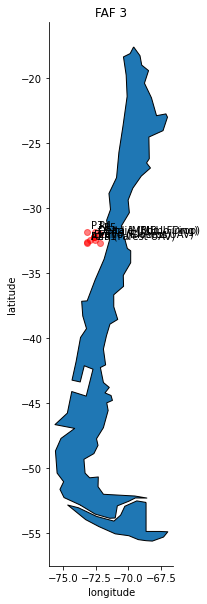

In [19]:
fig, gax = plt.subplots(figsize=(5,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Chile'").plot(ax=gax, edgecolor='black')

gdf.plot(ax=gax, color='red', alpha = 0.5)

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('FAF 3')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

for x, y, label in zip(gdf['geometry'].x, gdf['geometry'].y, gdf['Point Name']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

In [21]:
import folium
m = folium.Map(width=1100,height=380,location=[gdf.Latitude.mean(), 
                                               gdf.Longitude.mean()], zoom_start=8.1, min_zoom=5,max_zoom=10)
for index, location_info in gdf.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], 
                  popup=location_info["Point Name"]).add_to(m)
m